In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
from sklearn.model_selection import train_test_split
X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_fscore_support
cm=confusion_matrix(y_test,y_pred)

In [26]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        19\nIris-versicolor       1.00      1.00      1.00        15\n Iris-virginica       1.00      1.00      1.00        16\n\n       accuracy                           1.00        50\n      macro avg       1.00      1.00      1.00        50\n   weighted avg       1.00      1.00      1.00        50\n'

In [27]:
precision_recall_fscore_support(y_test,y_pred)

(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([19, 15, 16], dtype=int64))

In [28]:
def eval(cm, c):
    row_sum=np.sum(cm, axis=0)
    col_sum=np.sum(cm, axis=1)
    
    TP=cm[c][c]
    FP=col_sum[c]-cm[c][c]
    FN=row_sum[c]-cm[c][c]
    TN=np.sum(cm)-TP-FN-FP
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    return TP, FP, FN, TN, precision, recall,accuracy

In [29]:
TP_Setosa, FP_Setosa, FN_Setosa, TN_Setosa, precision_Setosa, recall_Setosa ,accuracy_setosa= eval(cm, 0)

In [30]:
print("For Class Setosa")
print("TP : ", TP_Setosa)
print("FP : ", FP_Setosa)
print("FN : ", FN_Setosa)
print("TN : ", TN_Setosa)
print("Precision : ", precision_Setosa)
print("Recall : ", recall_Setosa)
print("Accuarcy : ", accuracy_setosa)


For Class Setosa
TP :  19
FP :  0
FN :  0
TN :  31
Precision :  1.0
Recall :  1.0
Accuarcy :  1.0


<AxesSubplot:>

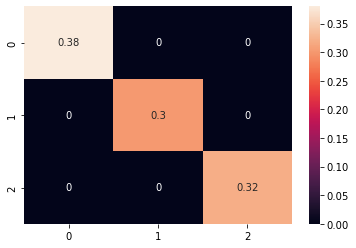

In [33]:
sns.heatmap(cm/np.sum(cm),annot=True)